In [23]:
import pandas as pd
import numpy as np
import nltk

from nltk import word_tokenize

In [24]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks2/NLP/data/bbc_text_cls.csv')

In [27]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [28]:
# populate word2idx
# convert documents into sequences of ints / ids / indices
idx = 0
word2idx = {}
tokenized_docs = []
for doc in df['text']:
  words = word_tokenize(doc.lower())
  doc_as_int = []
  for word in words:
    if word not in word2idx:
      word2idx[word] = idx
      idx += 1

    # save for later
    doc_as_int.append(word2idx[word])
  tokenized_docs.append(doc_as_int)

In [29]:
# reverse mapping
# if you do it smarter you can store it as a list
idx2word = {v:k for k, v in word2idx.items()}

In [30]:
# number of documents
N = len(df['text'])

In [31]:
# number of words
V = len(word2idx)

In [32]:
# instantiate term-frequency matrix
# note: could have also used count vectorizer
tf = np.zeros((N, V))

In [33]:
# populate term-frequency counts
for i, doc_as_int in enumerate(tokenized_docs):
  for j in doc_as_int:
    tf[i, j] += 1

In [34]:
# compute IDF
document_freq = np.sum(tf > 0, axis=0) # document frequency (shape = (V,))
idf = np.log(N / document_freq)

In [35]:
# compute TF-IDF
tf_idf = tf * idf

In [36]:
np.random.seed(123)

In [37]:
# pick a random document, show the top 5 terms (in terms of tf_idf score)
i = np.random.choice(N)
row = df.iloc[i]
print("Label:", row['labels'])
print("Text:", row['text'].split("\n", 1)[0])
print("Top 5 terms:")

scores = tf_idf[i]
indices = (-scores).argsort()

for j in indices[:5]:
  print(idx2word[j])

Label: sport
Text: Athens memories soar above lows
Top 5 terms:
paula
athens
1500m
her
kelly


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between two documents (e.g., document 0 and document 1)
similarity = cosine_similarity(tf_idf[0].reshape(1, -1), tf_idf[1].reshape(1, -1))
print(f"Cosine Similarity: {similarity[0][0]}")

Cosine Similarity: 0.036073034338563924


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tf_idf, df['labels'], test_size=0.2, random_state=42
)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the classifier's performance
accuracy = classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9662921348314607


In [40]:
from sklearn.decomposition import PCA, TruncatedSVD

# Apply PCA
pca = PCA(n_components=50)  # Choose the desired number of components
tf_idf_pca = pca.fit_transform(tf_idf)

# Apply Truncated SVD
svd = TruncatedSVD(n_components=50)
tf_idf_svd = svd.fit_transform(tf_idf)

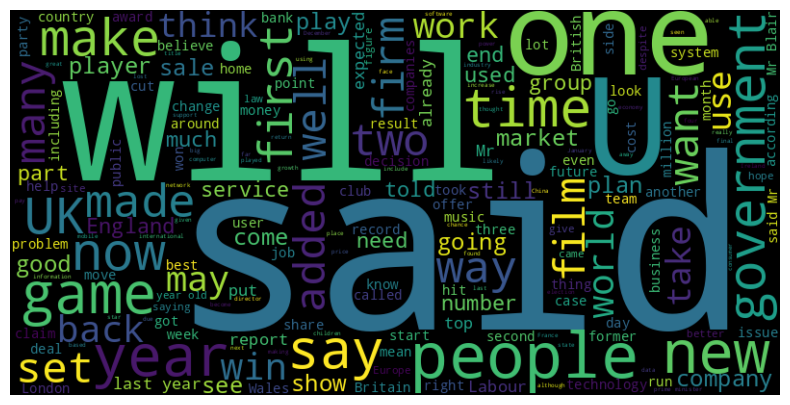

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for a specific document or the entire corpus
text = " ".join(df['text'])  # Combine all text into a single string
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()